# A Data-Driven Approach to Find a Winner - FIFA World Cup 2022

* FIFA World Cup 2018: A Data-Driven Approach to Ideal Team Line-Ups

https://towardsdatascience.com/fifa-world-cup-2018-a-data-driven-approach-to-ideal-team-line-ups-93505cfe36f8 

* Finding the favorite team in 2018 FIFA World Cup through scraping TweetsFinding the favorite team in 2018 FIFA World Cup through scraping Tweets

https://towardsdatascience.com/estimate-the-favorite-scraping-tweets-using-python-863303384e29https://towardsdatascience.com/estimate-the-favorite-scraping-tweets-using-python-863303384e29

```python
pip install tweepy
pip install python-dotenv
pip install pycountry # England is not available due to issue https://github.com/flyingcircusio/pycountry/issues/126
pip install emoji-country-flag
```

## 1. Collect meta data

For this analysis we will need to get finalists names and flags. For the names we can use Pandas to extract wiki data. 
Flags will be collected using Python libraries:
* pycountry
* emoji-country-flag

### 1.1 Collect finalists

https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_qualification

More info about scraping wiki info:

[Easily extract tables from websites with pandas and python](https://www.youtube.com/watch?v=OXA_ZD1gR6A)

In [1]:
from pandas.io.html import read_html
page = 'https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_qualification'

wikitables = read_html(page)
len(wikitables)

30

In [2]:
df_fin = wikitables[1]
df_fin.head()

,Team,Method ofqualification,Date ofqualification,Totaltimesqualified,Lasttimequalified,Currentconsecutiveappearances,Previous bestperformance
0,Qatar,Hosts,2 December 2010,1,–,1,–
1,Germany,UEFA Group J winners,11 October 2021,20[a],2018,18,"Winners (1954, 1974, 1990, 2014)"
2,Denmark,UEFA Group F winners,12 October 2021,6,2018,2,Quarter-finals (1998)
3,Brazil,CONMEBOL winners,11 November 2021,22,2018,22,"Winners (1958, 1962, 1970, 1994, 2002)"
4,France,UEFA Group D winners,13 November 2021,16,2018,7,"Winners (1998, 2018)"


In [48]:
df2[['created_at', 'id', 'text']].head(5)

,created_at,id,text
0,2022-11-20 11:14:41+00:00,1594288115992043520,RT @sushimmii: @rahmdess27 @BTS_twt DREAMERS B...
1,2022-11-20 11:14:41+00:00,1594288115895914496,"RT @FIFAWorldCup: ""See you at the Opening!"" - ..."
2,2022-11-20 11:14:41+00:00,1594288115635539969,@kingnyamjoon DREAMERS BY JUNGKOOK\nDREAMERS S...
3,2022-11-20 11:14:41+00:00,1594288115581358081,RT @btsarmy39521947: Jungkook 💜\nI’m so addict...
4,2022-11-20 11:14:41+00:00,1594288115283214336,RT @Bangtan_twt_com: @btssomma DREAMERS BY JUN...


In [49]:
import pyperclip

pyperclip.copy((df2[['created_at', 'id', 'text']].head(5).to_html(classes='table table-striped text-center', justify='center', index=True)))

In [3]:
finalists = df_fin['Team'].values
print(finalists)
len(finalists)

['Qatar' 'Germany' 'Denmark' 'Brazil' 'France' 'Belgium' 'Serbia' 'Spain'
 'Croatia' 'Switzerland' 'England' 'Netherlands' 'Argentina' 'Iran'
 'South Korea' 'Saudi Arabia' 'Japan' 'Uruguay' 'Ecuador' 'Canada' 'Ghana'
 'Senegal' 'Poland' 'Portugal' 'Tunisia' 'Morocco' 'Cameroon'
 'United States' 'Mexico' 'Wales' 'Australia' 'Costa Rica']


32

### 1.2 Get Country Flags

In [41]:
import pycountry
pycountry.countries.search_fuzzy('Brazil')

[Country(alpha_2='BR', alpha_3='BRA', flag='🇧🇷', name='Brazil', numeric='076', official_name='Federative Republic of Brazil')]

In [5]:
countries = []
for fin in finalists:
    try:
        country = pycountry.countries.search_fuzzy(fin)[0]
        flag = country.flag
        country = {fin:flag}
    except:
        print(fin)
    countries.append(country)        
print(countries)

England
[{'Qatar': '🇶🇦'}, {'Germany': '🇩🇪'}, {'Denmark': '🇩🇰'}, {'Brazil': '🇧🇷'}, {'France': '🇫🇷'}, {'Belgium': '🇧🇪'}, {'Serbia': '🇷🇸'}, {'Spain': '🇪🇸'}, {'Croatia': '🇭🇷'}, {'Switzerland': '🇨🇭'}, {'Switzerland': '🇨🇭'}, {'Netherlands': '🇳🇱'}, {'Argentina': '🇦🇷'}, {'Iran': '🇮🇷'}, {'South Korea': '🇰🇷'}, {'Saudi Arabia': '🇸🇦'}, {'Japan': '🇯🇵'}, {'Uruguay': '🇺🇾'}, {'Ecuador': '🇪🇨'}, {'Canada': '🇨🇦'}, {'Ghana': '🇬🇭'}, {'Senegal': '🇸🇳'}, {'Poland': '🇵🇱'}, {'Portugal': '🇵🇹'}, {'Tunisia': '🇹🇳'}, {'Morocco': '🇲🇦'}, {'Cameroon': '🇨🇲'}, {'United States': '🇺🇸'}, {'Mexico': '🇲🇽'}, {'Wales': '🇦🇺'}, {'Australia': '🇦🇺'}, {'Costa Rica': '🇨🇷'}]


In [6]:
{'England': '󠁧󠁢󠁥󠁮󠁧🏴󠁧󠁢󠁥󠁮󠁧󠁿'}

{'England': '\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f'}

In [38]:
import flag
    
flag.flag("BR")

'🇧🇷'

In [8]:
# England is not working again
flag.flag("GBENG")

'🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f'

In [9]:
countries.append({'England': flag.flag("GB")})
print(countries)

[{'Qatar': '🇶🇦'}, {'Germany': '🇩🇪'}, {'Denmark': '🇩🇰'}, {'Brazil': '🇧🇷'}, {'France': '🇫🇷'}, {'Belgium': '🇧🇪'}, {'Serbia': '🇷🇸'}, {'Spain': '🇪🇸'}, {'Croatia': '🇭🇷'}, {'Switzerland': '🇨🇭'}, {'Switzerland': '🇨🇭'}, {'Netherlands': '🇳🇱'}, {'Argentina': '🇦🇷'}, {'Iran': '🇮🇷'}, {'South Korea': '🇰🇷'}, {'Saudi Arabia': '🇸🇦'}, {'Japan': '🇯🇵'}, {'Uruguay': '🇺🇾'}, {'Ecuador': '🇪🇨'}, {'Canada': '🇨🇦'}, {'Ghana': '🇬🇭'}, {'Senegal': '🇸🇳'}, {'Poland': '🇵🇱'}, {'Portugal': '🇵🇹'}, {'Tunisia': '🇹🇳'}, {'Morocco': '🇲🇦'}, {'Cameroon': '🇨🇲'}, {'United States': '🇺🇸'}, {'Mexico': '🇲🇽'}, {'Wales': '🇦🇺'}, {'Australia': '🇦🇺'}, {'Costa Rica': '🇨🇷'}, {'England': '🇬🇧'}]


## 2. Extract Tweets

You may need `Elevated access` to avoid error with the first example:

> Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

### 2.1 Elevated access

In [11]:
import os
import tweepy
from dotenv import load_dotenv, find_dotenv
from pathlib import Path

path='./conf/.env'
load_dotenv(dotenv_path=path,verbose=True)


consumer_key = os.environ["API_KEY"]
consumer_secret = os.environ["API_KEY_SECRET"]
access_token = os.environ["ACCESS_TOKEN"]
access_token_secret = os.environ["ACCESS_TOKEN_SECRET"]

auth = tweepy.OAuth1UserHandler(
  consumer_key, 
  consumer_secret, 
  access_token, 
  access_token_secret
)

api = tweepy.API(auth)

tweets = api.search_tweets("World cup", tweet_mode="extended")

for tweet in tweets:
    try:
        print(tweet.retweeted_status.full_text)
        print("=====")
    except AttributeError:
        print(tweet.full_text)
        print("=====")

### 2.2 BEARER_TOKEN

In [43]:
import tweepy
import pandas as pd

bearer_token = os.environ["BEARER_TOKEN"]
client = tweepy.Client(bearer_token=bearer_token)

"""
More examples
https://github.com/twitterdev/getting-started-with-the-twitter-api-v2-for-academic-research/blob/main/modules/5-how-to-write-search-queries.md
"""

query = '#FIFAWorldCup'
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=10)

df2 = pd.DataFrame(tweets.data)

### 2.3. Search more than 100 twits

In [30]:
import tweepy

client = tweepy.Client(bearer_token=bearer_token)

query = '#FIFAWorldCup'
tweets = tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=10000)

ls = []
for tweet in tweets:
    ls.append(tweet)
import pandas as pd
df = pd.DataFrame(ls)

In [15]:
df

,context_annotations,created_at,edit_history_tweet_ids,id,text,withheld
0,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:27+00:00,[1594265659239813126],1594265659239813126,#رونالدو يقود حصة تدريبية للاعبي منتخب البرتغا...,NaN
1,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:27+00:00,[1594265658787008512],1594265658787008512,Possibly the finest footballer there ever was ...,NaN
2,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:27+00:00,[1594265658082066435],1594265658082066435,"RT @FIFAWorldCup: ""See you at the Opening!"" - ...",NaN
3,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:27+00:00,[1594265658073944064],1594265658073944064,RT @breathMessi23: Every Stadium for the match...,NaN
4,NaN,2022-11-20 09:45:27+00:00,[1594265657872650240],1594265657872650240,RT @soccernews_euro: カタールW杯開幕を記念して初のプレゼント企画🎁\n...,NaN
...,...,...,...,...,...,...
995,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:44:13+00:00,[1594265348072669184],1594265348072669184,RT @promisethv: OMG! I’m so addicted with #Jun...,NaN
996,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:44:13+00:00,[1594265348026601472],1594265348026601472,RT @BTSChartsDailyx: 📊| #Dreamers by Jungkook ...,NaN
997,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:44:13+00:00,[1594265347716153344],1594265347716153344,RT @unitedmasters: ‘Dreamers’ Official Fan Cha...,NaN
998,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:44:13+00:00,[1594265347648999424],1594265347648999424,@ENERGY @LaCasaBlanca @Casablanca @SecCardona ...,NaN


## 4. Analyse Extracted Data

### 4.1 Search by name

In [50]:
df[df.text.str.contains('Spain')]

,context_annotations,created_at,edit_history_tweet_ids,id,text,withheld
1527,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:47:08+00:00,[1594266081128222720],1594266081128222720,My predictions for the 2022 FIFA World Cup\n\n...,NaN
3044,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:14+00:00,[1594265604483354624],1594265604483354624,The time is over now. This is the event where ...,NaN
3236,"[{'domain': {'id': '46', 'name': 'Business Tax...",2022-11-20 09:44:59+00:00,[1594265540822007810],1594265540822007810,RT @Jungkook_Spain_: 🎯 METAS ESPAÑA 🇪🇦🎯\n\nLa ...,NaN
3362,"[{'domain': {'id': '46', 'name': 'Business Tax...",2022-11-20 09:44:49+00:00,[1594265500347142150],1594265500347142150,RT @PHGoldenA: DREAMERS by Jungkook topped iTu...,NaN
4852,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:43:02+00:00,[1594265048137928704],1594265048137928704,World Cup Football Finals \n\n2010 - Spain🇪🇸 (...,NaN
8968,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:38:07+00:00,[1594263810306605056],1594263810306605056,The #FIFAWorldCup starts today and I want to k...,NaN
9886,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:37:05+00:00,[1594263553221050368],1594263553221050368,RT @Jungkook_Spain_: [TRAD] #Dreamers2022\n\nL...,NaN


In [51]:
df[df.text.str.contains('Germany')]

,context_annotations,created_at,edit_history_tweet_ids,id,text,withheld
61,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:48:59+00:00,[1594266546037469184],1594266546037469184,Pro-Russian forces brutally drop bombs over Uk...,NaN
485,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:48:28+00:00,[1594266417683402754],1594266417683402754,"In honour of the #FIFAWorldCup starting today,...",NaN
672,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:48:14+00:00,[1594266359458066432],1594266359458066432,My #FIFAWorldCup predictions :\n1. Argentina\n...,NaN
700,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:48:12+00:00,[1594266350087995392],1594266350087995392,Gol di Grosso!!!\n#Italy #Germany2006 #FabioGr...,NaN
1101,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:47:42+00:00,[1594266226028683267],1594266226028683267,Ukrainian forces target Russian soldiers with ...,NaN
1681,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:46:57+00:00,[1594266034218860544],1594266034218860544,"AL RUWAIS, QATAR - NOVEMBER 20: Thilo #Kehrer ...",NaN
2098,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:46:26+00:00,[1594265906955563008],1594265906955563008,Counter-attack!!! Ukrainian 30th Brigade destr...,NaN
2997,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:18+00:00,[1594265618122883073],1594265618122883073,"""world cup is not political"" yeah except that ...",NaN
3044,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:45:14+00:00,[1594265604483354624],1594265604483354624,The time is over now. This is the event where ...,NaN
3378,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-11-20 09:44:48+00:00,[1594265495385030657],1594265495385030657,Ukrainian Troops Attack Dozens of Russian Tank...,NaN


### 4.2 Search by Flag

In [80]:
df[df.text.str.contains(flag.flag("FR"))].shape

(45, 6)

In [82]:
df[df.text.str.contains(flag.flag("BR"))].shape

(48, 6)

In [ ]:
df[df.text.str.contains(flag.flag("BR"))].shape

## 5. Select Winner by tweets

## 6. Check most tweeted countries

In [60]:
count_team = []
for team in df_fin['Team']:
    count_team.append(df[df['text'].str.contains(team)].shape[0])
df_fin['count'] = count_team

<AxesSubplot:xlabel='Team'>

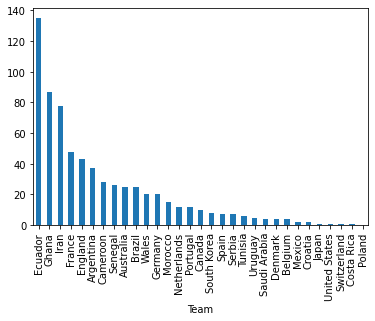

In [69]:
df_fin.sort_values('count', ascending=False).set_index('Team').tail(31)['count' ].plot(kind='bar')

In [76]:
count_team = []
for team in countries:
    print(team.values())
    count_team.append(df[df['text'].str.contains(team)].shape[0])
df_fin['count'] = count_team

dict_values(['🇶🇦'])


TypeError: unhashable type: 'dict'